# Develop A Neural Network That Can Read Handwriting

In [5]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

### Load the data and split between train and test sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


### Reshape the data

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

### Visualize some image

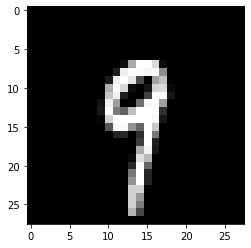

In [7]:
plt.imshow(x_train[600,:,:], cmap='gray')

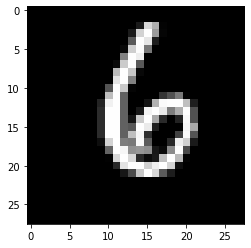

In [8]:
plt.imshow(x_train[2300,:,:], cmap='gray')

In [9]:
y_train[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

### convert class vectors to binary class matrices

In [10]:
num_classes = 10  # 10 digits
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Scale the data in the range [0, 1]

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Create the CNN Model with Relu Activation Function and Adam Optimizer 

In [12]:

model = Sequential([
    Conv2D(16, kernel_size=(3, 3),  activation='relu', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3),activation='relu',),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax')
], name='MNIST_model_4')

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "MNIST_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         73856     
                                                     

### Create model checkpoint to save the best fit model automatically with good accuracy

In [13]:
import os
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), monitor='accuracy', mode='max', 
                                          verbose=0, save_best_only=True)

### Train the model 10 epochs

In [14]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=10,verbose=1, callbacks=[create_model_checkpoint(model.name)])
print("The model has successfully trained")

Epoch 1/10
59/59 [==============================] - 40s 668ms/step - loss: 0.5684 - accuracy: 0.8176
Epoch 2/10
59/59 [==============================] - 43s 740ms/step - loss: 0.1095 - accuracy: 0.9669
Epoch 3/10
59/59 [==============================] - 44s 754ms/step - loss: 0.0703 - accuracy: 0.9781
Epoch 4/10
59/59 [==============================] - 44s 745ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 5/10
59/59 [==============================] - 45s 759ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 6/10
59/59 [==============================] - 47s 791ms/step - loss: 0.0390 - accuracy: 0.9876
Epoch 7/10
59/59 [==============================] - 44s 750ms/step - loss: 0.0334 - accuracy: 0.9894
Epoch 8/10
59/59 [==============================] - 44s 756ms/step - loss: 0.0280 - accuracy: 0.9917
Epoch 9/10
59/59 [==============================] - 44s 749ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 10/10
59/59 [==============================] - 45s 759ms/step - loss: 0.0214 - accura

### load the best fit model and evaluate on test data

In [16]:
from keras.models import load_model
saved_model = load_model('model_experiments/' + model.name)
saved_model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0187 - accuracy: 0.9938


[0.018711483106017113, 0.9937999844551086]